# DATA832 - Vizualisation

## Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [56]:
# Read data
df = pd.read_csv('data/Country-data.csv')

df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Importance of each feature

### Mean and Variance

In [57]:
# Calculate mean and variance for each feature
mean = df.mean()
variance = df.var()

print(mean)
print(variance)

# # Plot mean
# plt.figure(figsize=(14,6))
# mean.plot(kind='bar', logy=True)
# plt.title('Mean of each feature')
# plt.show()
#
# # Plot variance
# plt.figure(figsize=(14,6))
# variance.plot(kind='bar', logy=True)
# plt.title('Variance of each feature')
# plt.show()

child_mort       38.270060
exports          41.108976
health            6.815689
imports          46.890215
income        17144.688623
inflation         7.781832
life_expec       70.555689
total_fer         2.947964
gdpp          12964.155689
dtype: float64
child_mort    1.626423e+03
exports       7.514183e+02
health        7.545116e+00
imports       5.861042e+02
income        3.716439e+08
inflation     1.117398e+02
life_expec    7.908851e+01
total_fer     2.291734e+00
gdpp          3.359414e+08
dtype: float64


/var/folders/k1/k53d2l5d76xgyv8wbt38h3v40000gn/T/ipykernel_43354/1019351676.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()
/var/folders/k1/k53d2l5d76xgyv8wbt38h3v40000gn/T/ipykernel_43354/1019351676.py:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = df.var()


### Correlation

/var/folders/k1/k53d2l5d76xgyv8wbt38h3v40000gn/T/ipykernel_43354/2802201251.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


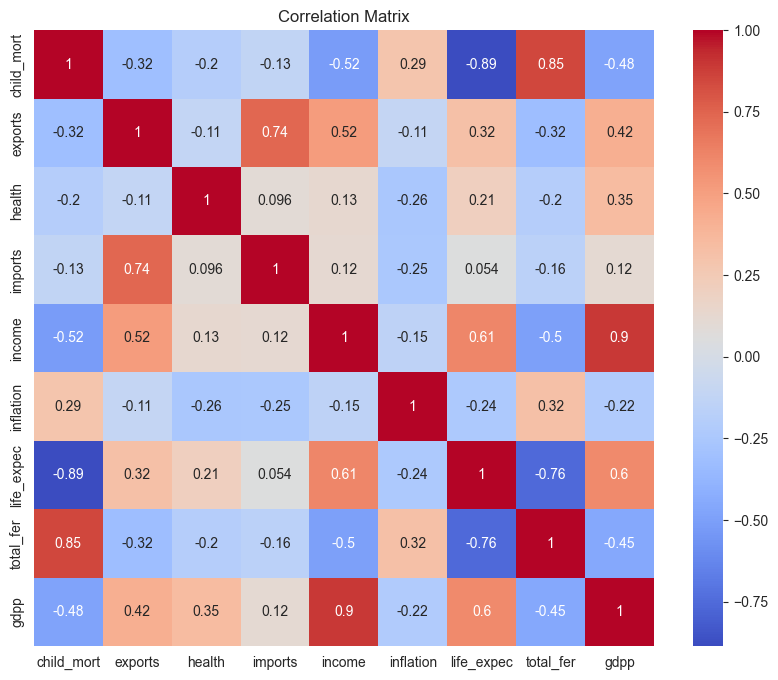

In [58]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data distribution

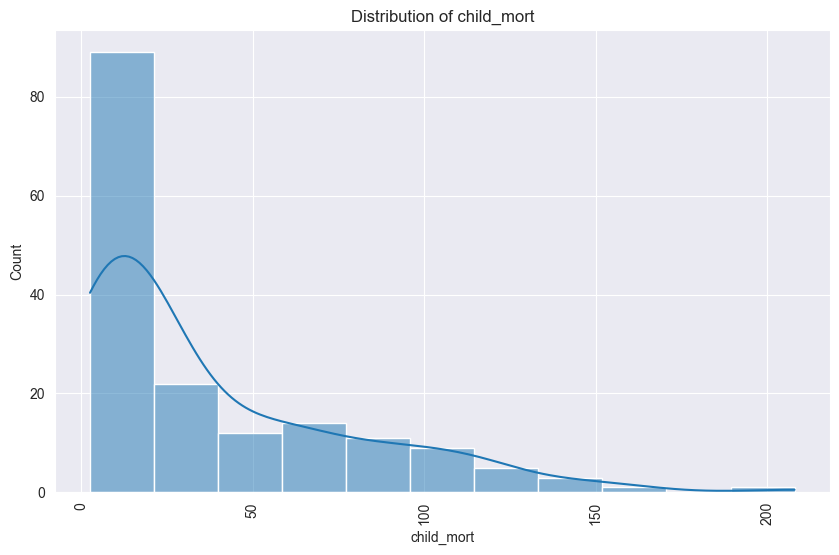

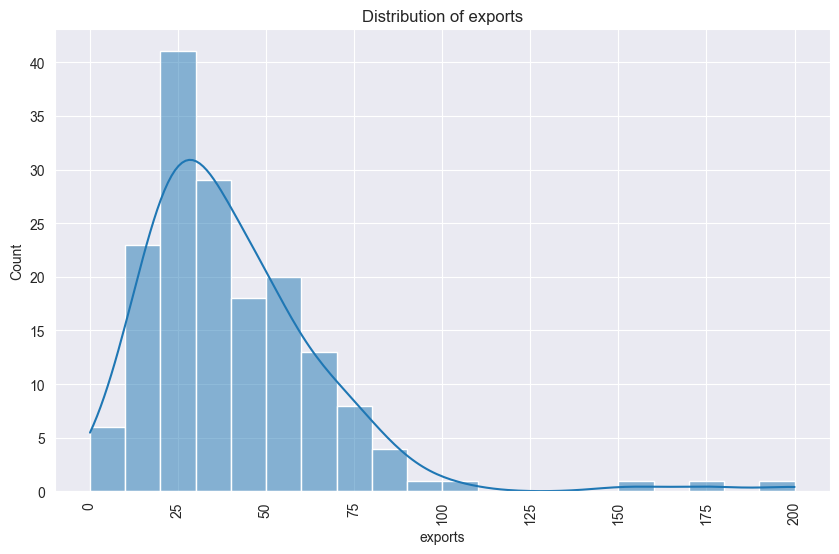

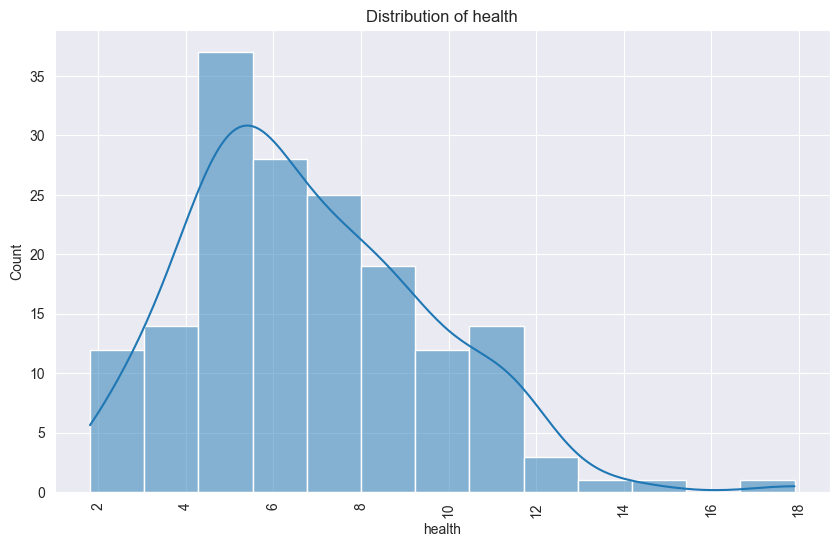

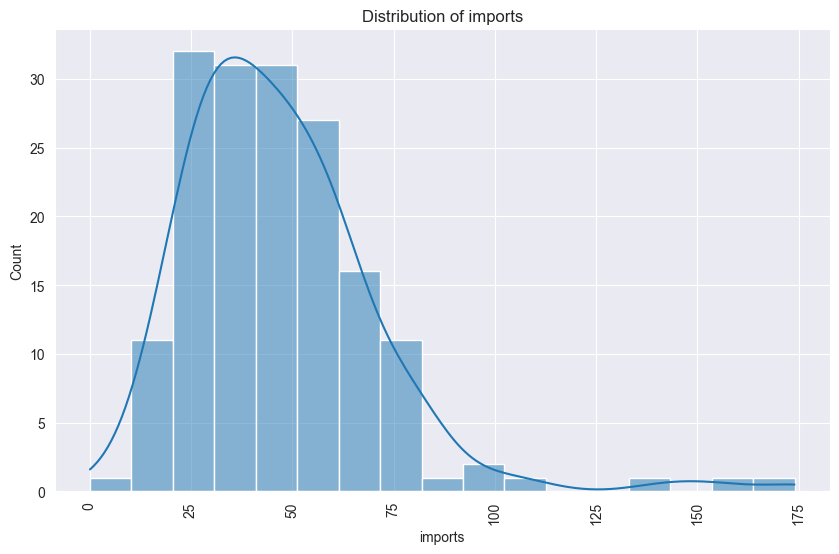

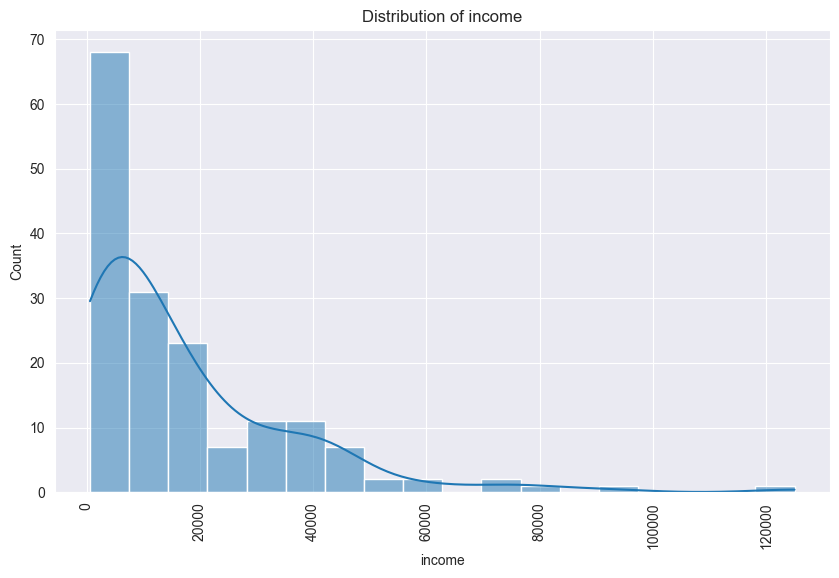

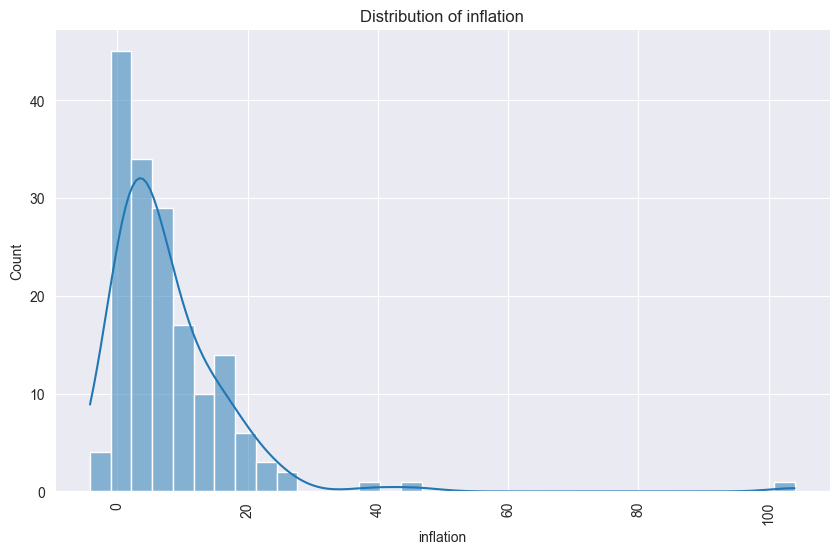

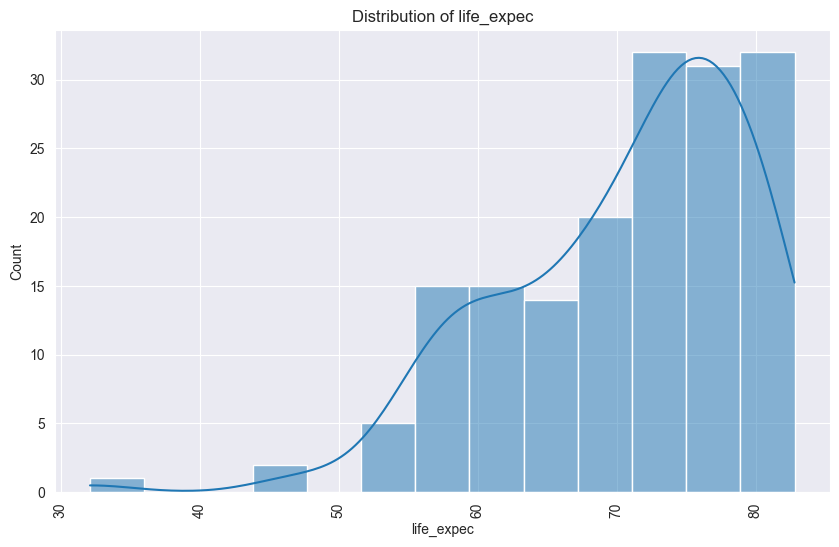

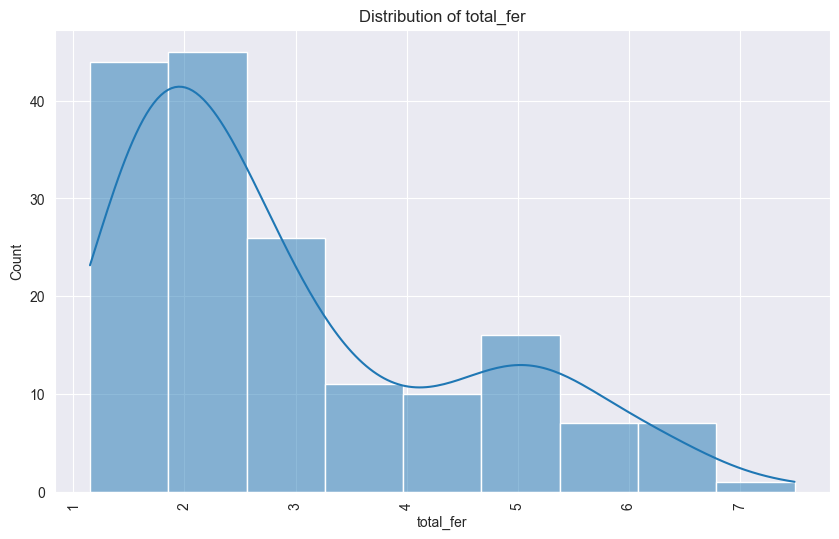

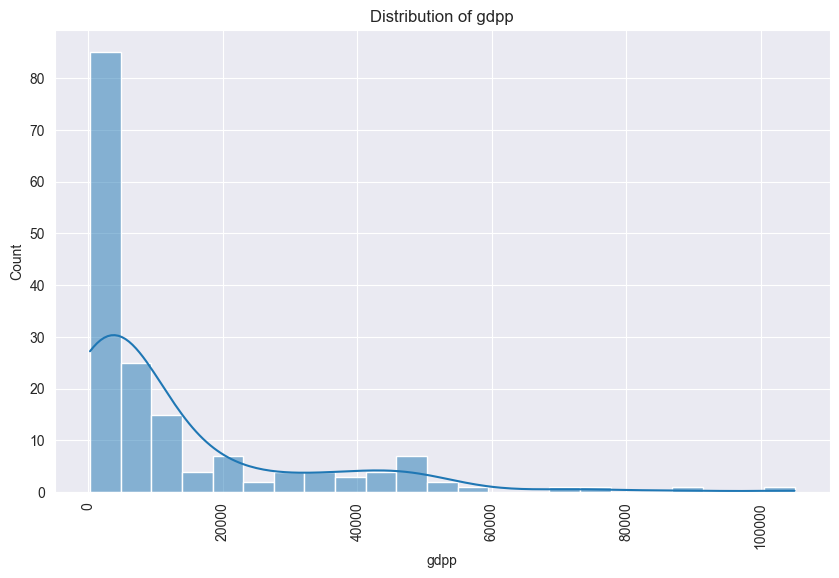

In [59]:
# Set 'country' as index
df.set_index('country', inplace=True)

# Get the list of features
features = df.columns

# Create a histplot for each feature
for feature in features:
    if feature != 'country':
        plt.figure(figsize=(10,6))
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=90)
        plt.show()

## Set of variable description country

In [60]:
def plot_top_countries(df, feature, top_n, highest=True):
    # Sort DataFrame by feature
    sorted_df = df.sort_values(by=feature, ascending=not highest)

    # Select top_n rows
    top_countries = sorted_df.head(top_n)

    # Plot histogram
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_countries.index, y=top_countries[feature])
    plt.title(f'Top {top_n} countries with {"highest" if highest else "lowest"} {feature}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.show()


### Display top 10 countries with highest and lowest values for each feature
If we find often the same countries in the top 10 in differents feature, we can assume that the feature are important to keep.

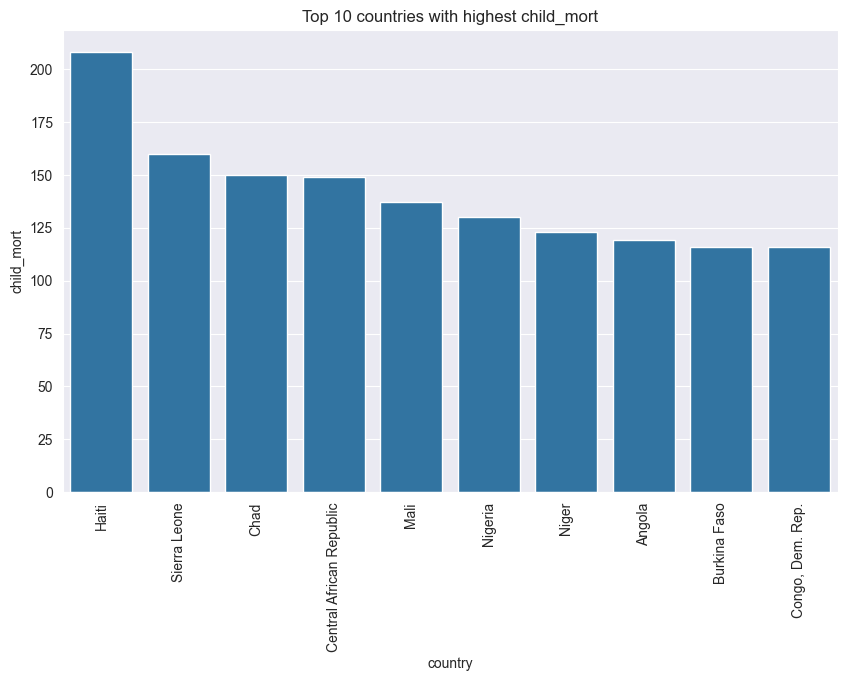

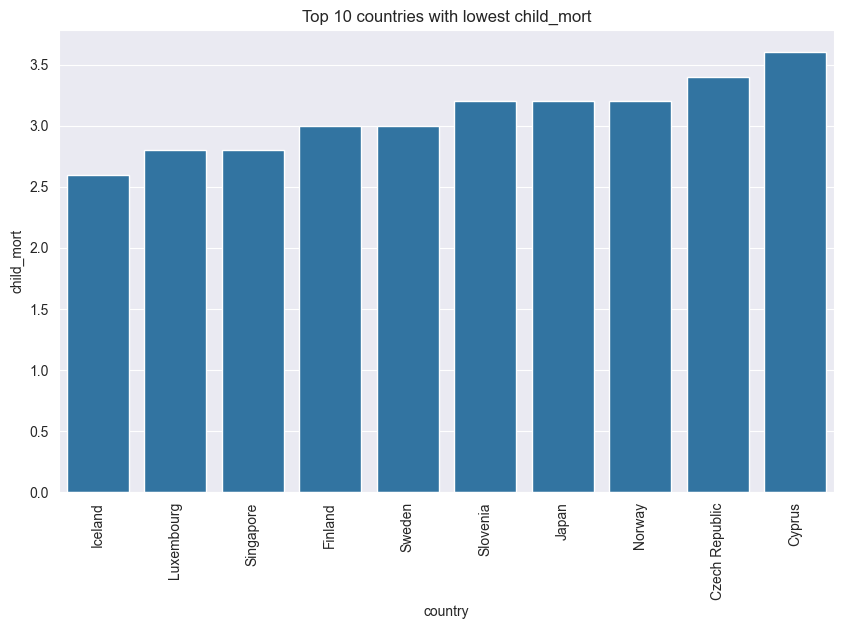

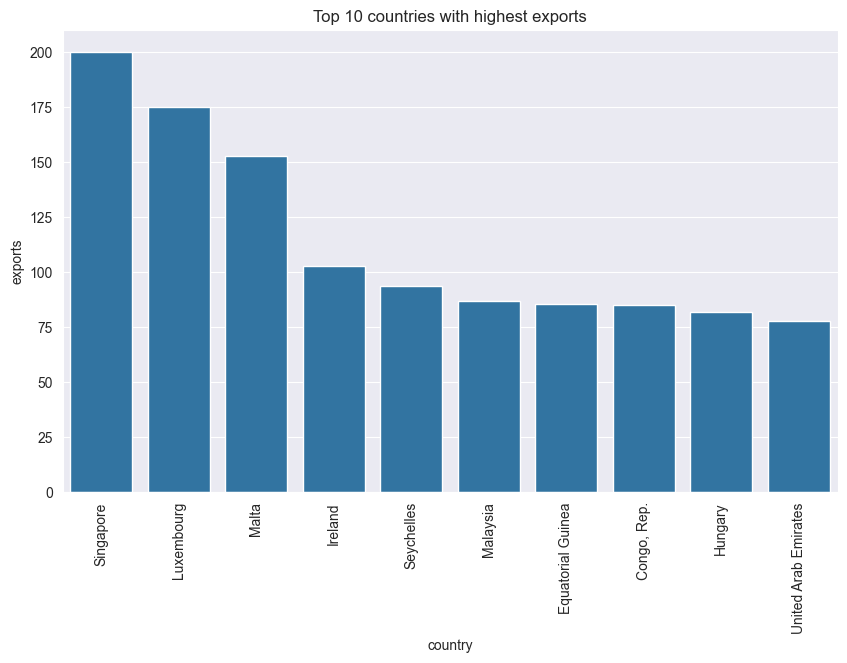

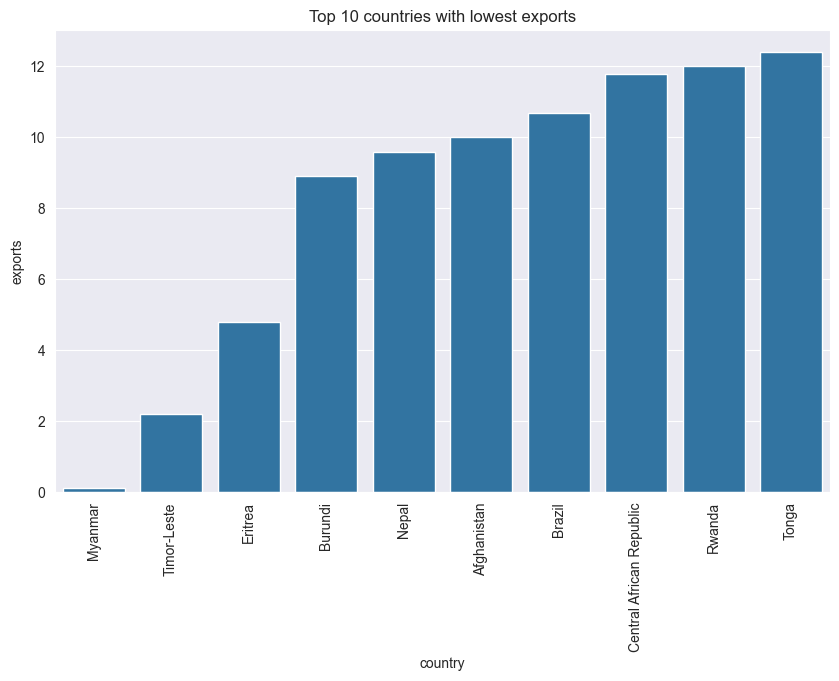

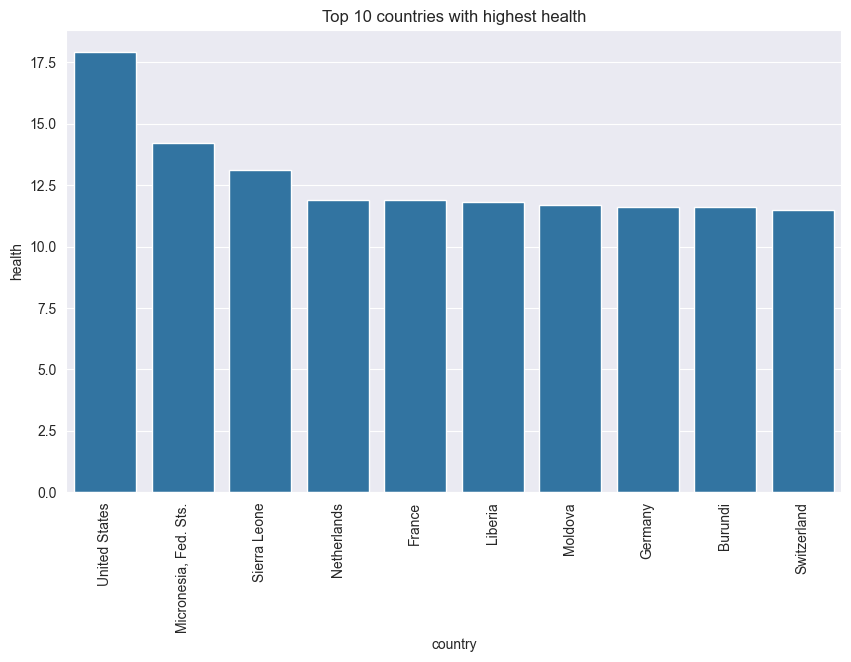

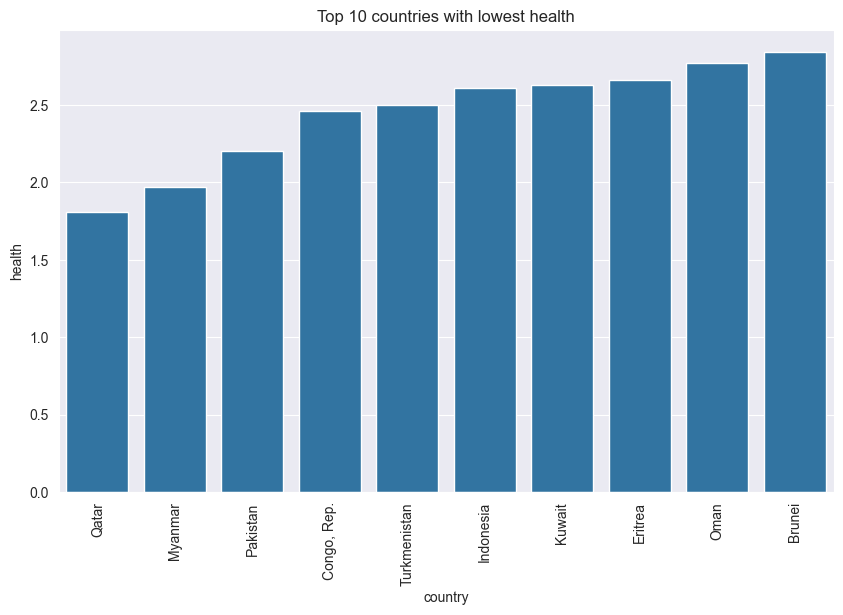

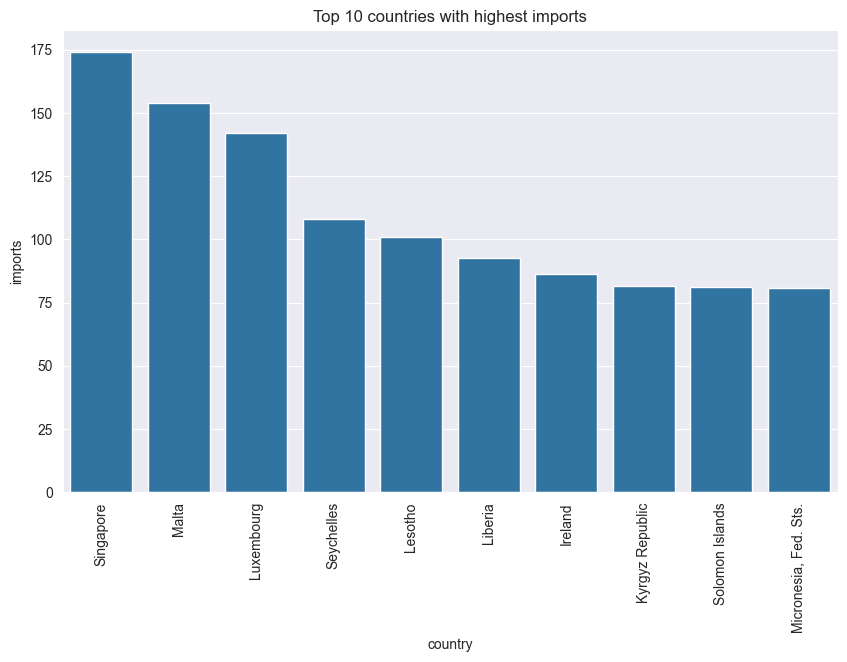

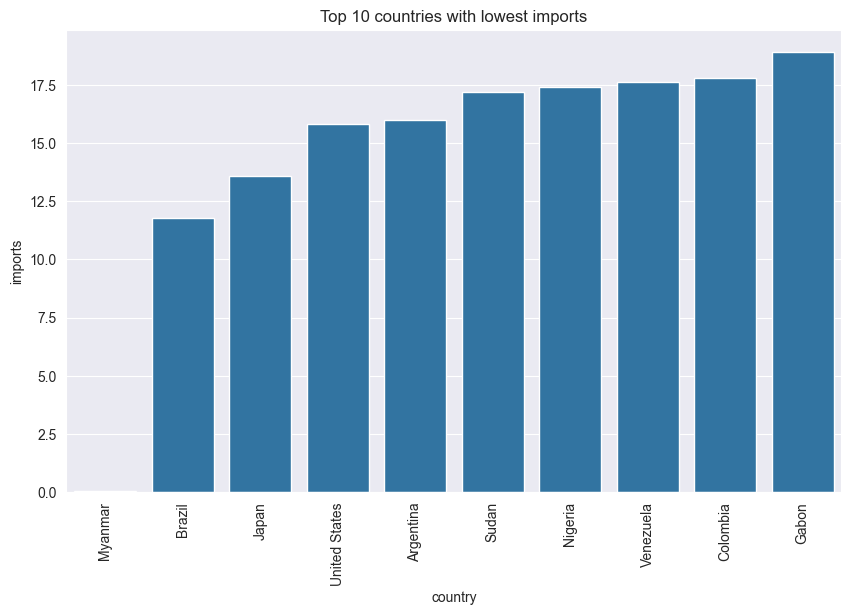

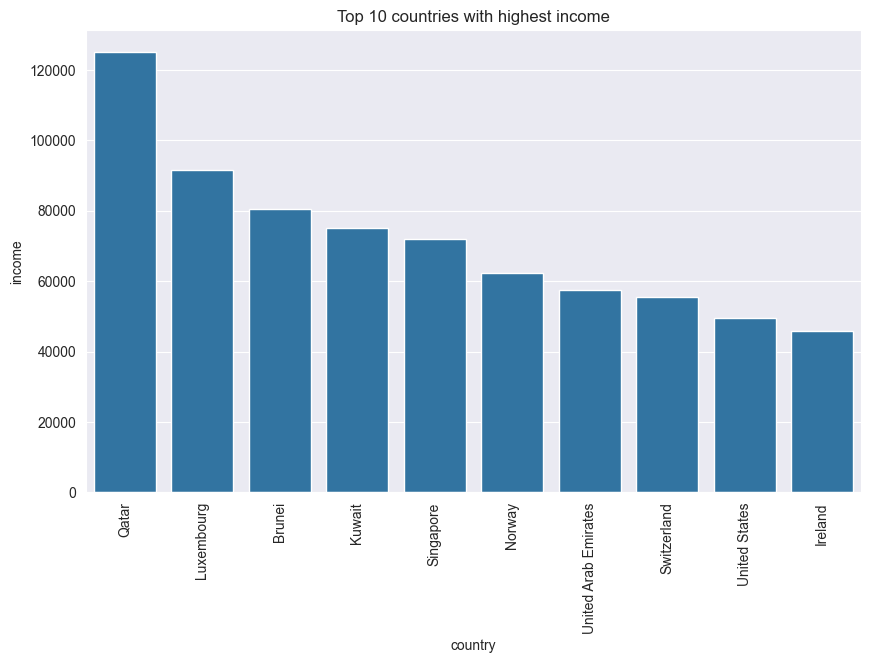

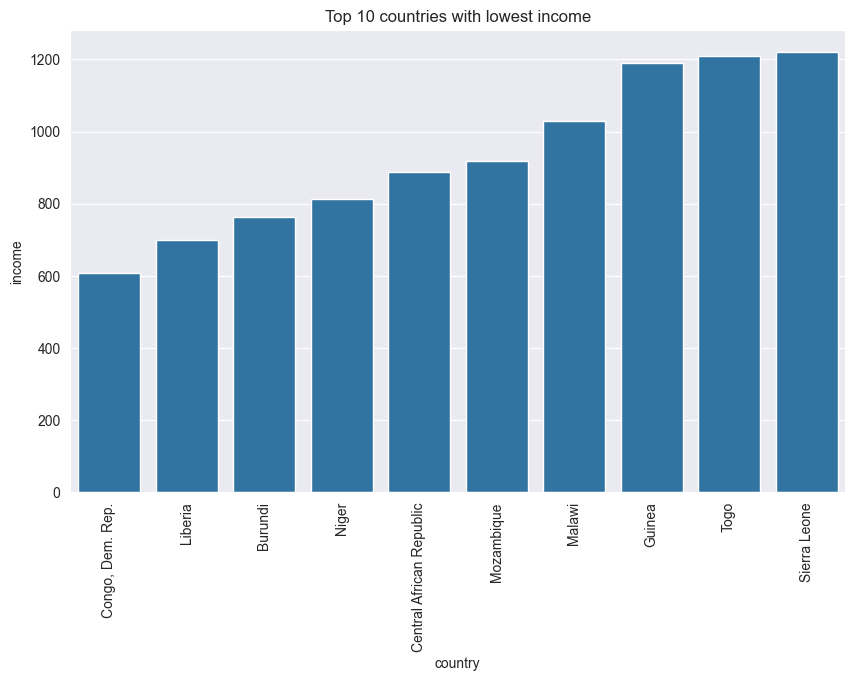

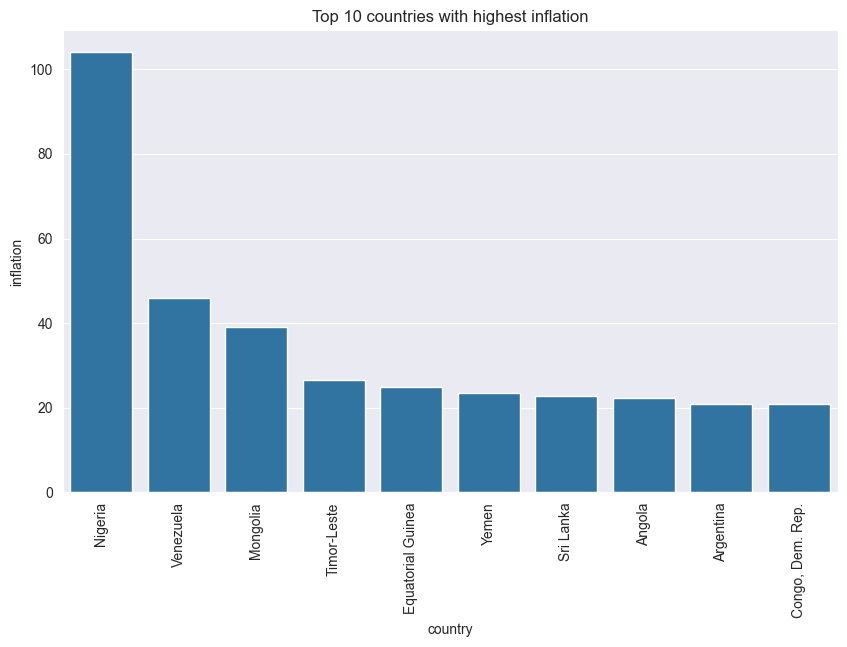

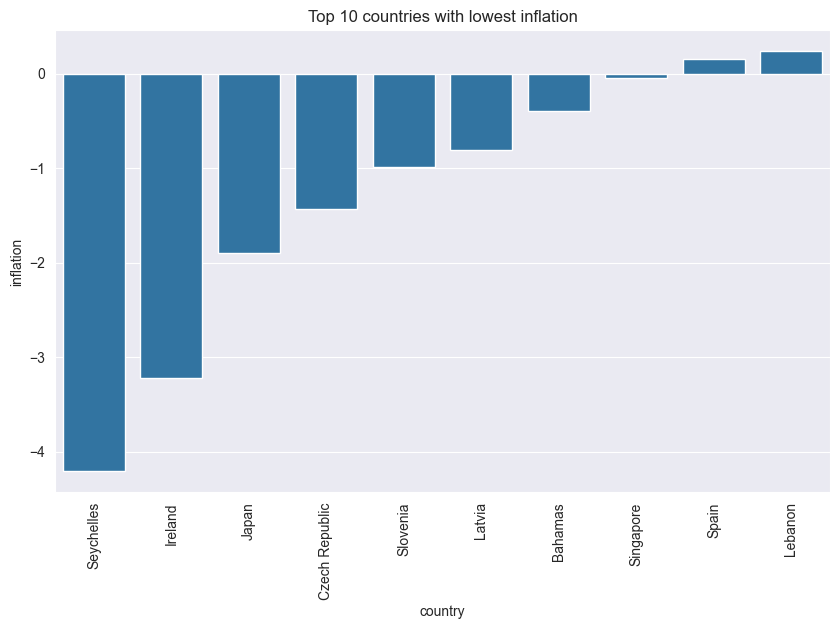

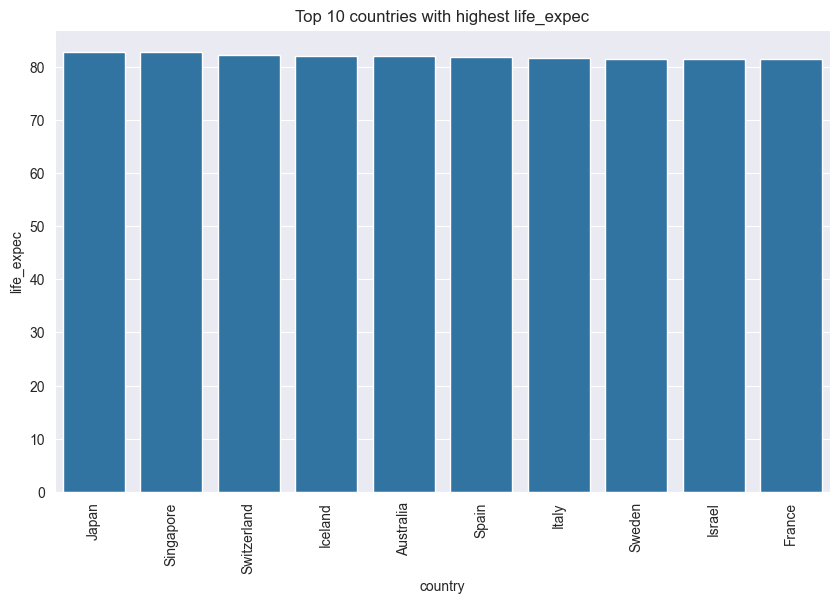

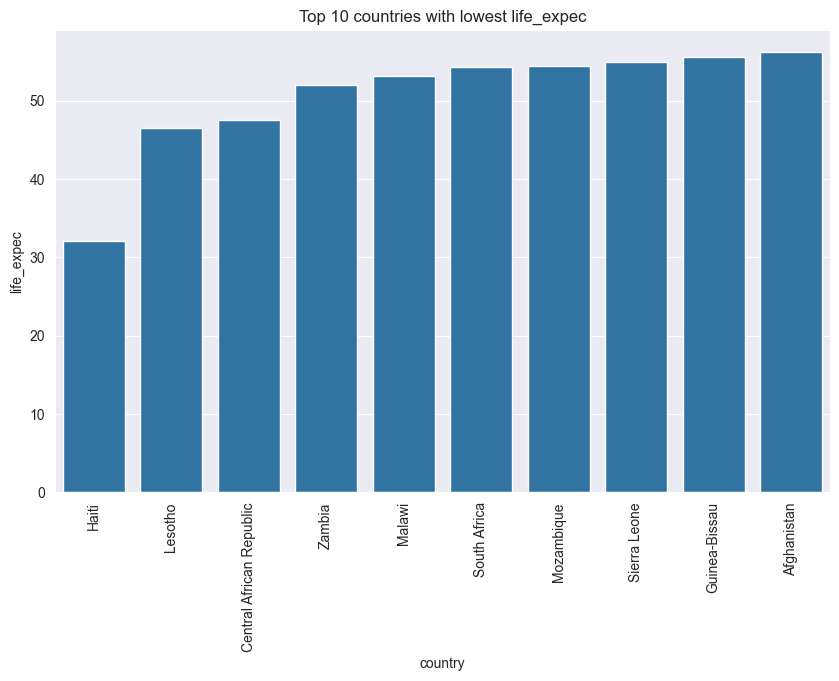

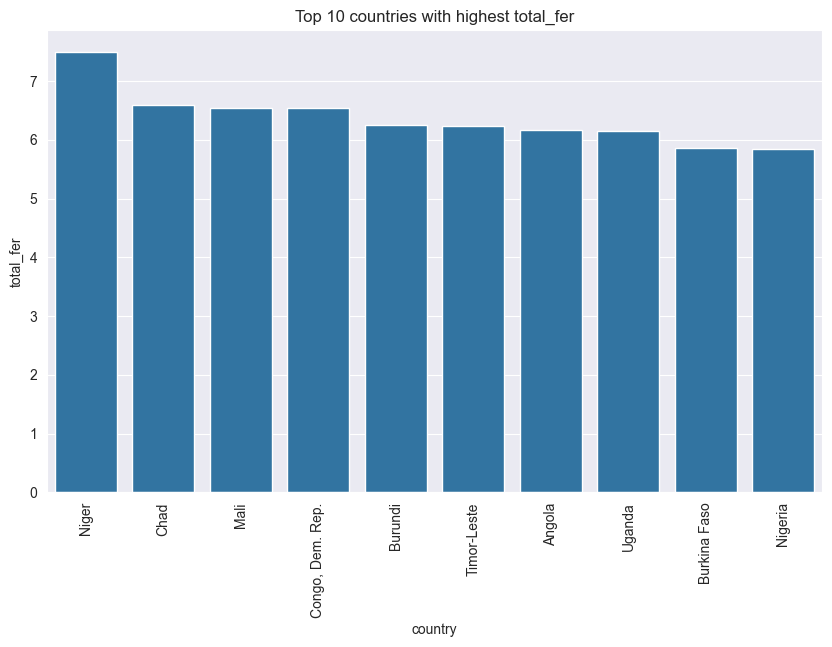

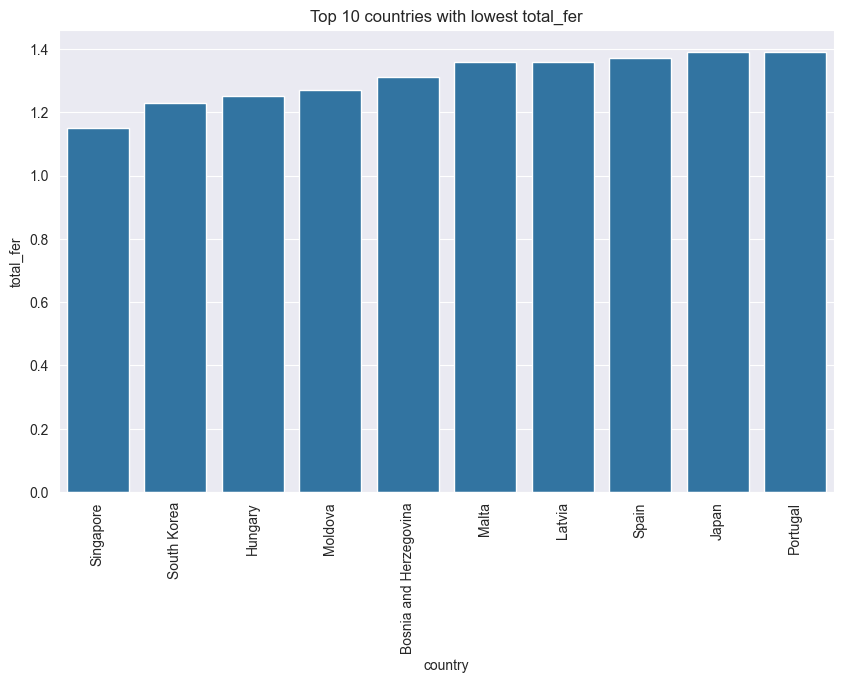

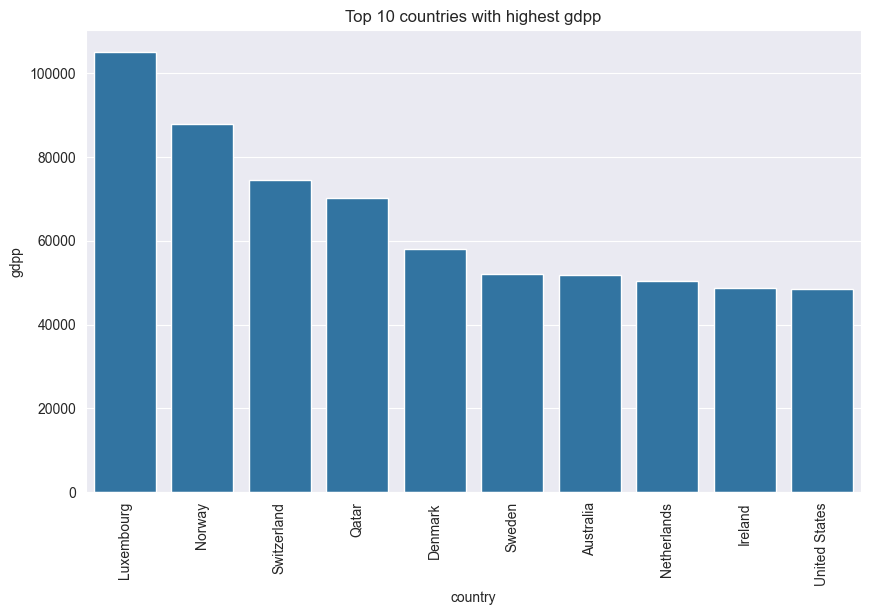

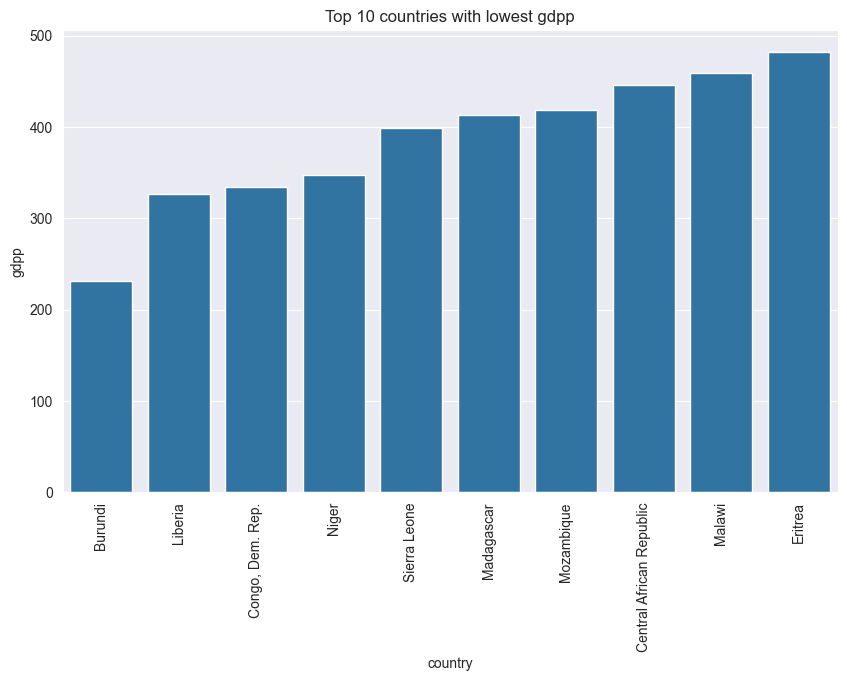

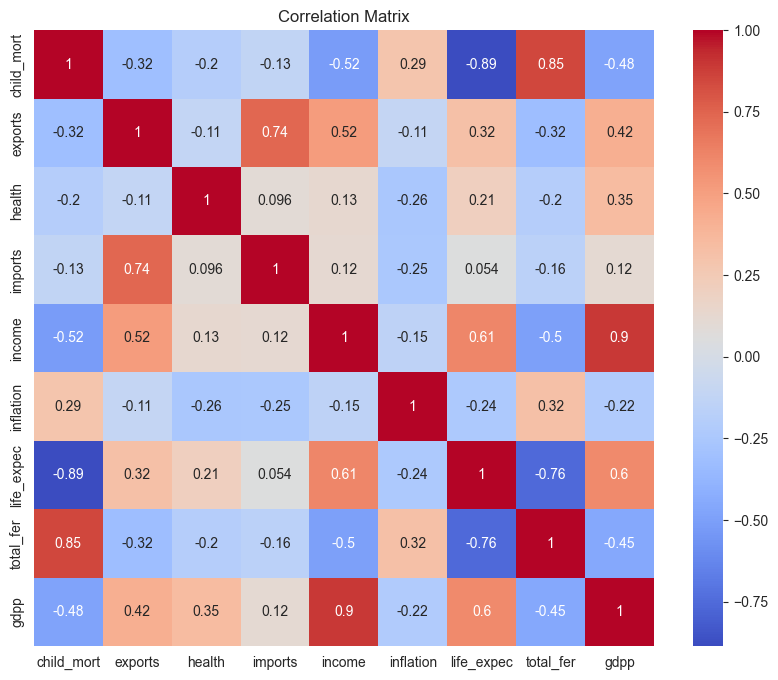

In [61]:
# Plot top 10 countries with highest and lowest values for each feature
for feature in features:
    if feature != 'country':
        plot_top_countries(df, feature, 10, highest=True)
        plot_top_countries(df, feature, 10, highest=False)

# Display correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()